goal: save hf models from remote to local disk, so that I can populate the directory with evaluation results.

[0.02 0.2  0.4  0.8  1.  ]


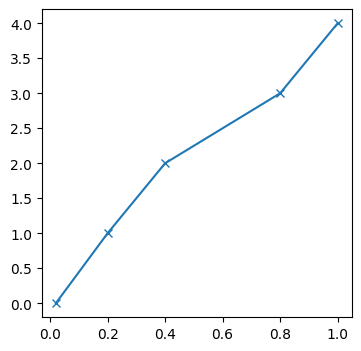

In [18]:
import matplotlib.pyplot as plt
import numpy as np
xs = np.array([1,10,20,40,50])*1000 / 50_000
print(xs)
ys = np.arange(len(xs))
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.plot(xs, ys, 'x-')
# ax.set_xscale('log')
# ax.set_xticks(xs,xs)

In [1]:
import platform
import sys
from huggingface_hub import snapshot_download
import os

/dccstor/data-pruning/miniconda3/envs/open-instruct/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

save_dir = '../results/baselines/'
os.makedirs(save_dir, exist_ok=True)

repo_ids = [
    # encoder-decoder
    # t5
    't5-small',
    't5-base',
    't5-large',
    't5-3b',
    't5-11b',
#     # flan-t5
    'google/flan-t5-small',
    'google/flan-t5-base',
    'google/flan-t5-large',
    'google/flan-t5-xl'
    'google/flan-t5-xxl',
#     # decoder-only
#     # 124M, 355M, 774M, 1.5B
    'gpt2',
    'gpt2-medium',
    'gpt2-large',
    'gpt2-xl',
    # mpt
    'mosaicml/mpt-7b',
    # instruction tuned pythia
    'databricks/dolly-v2-7b',
    # 
    'allenai/open-instruct-cot-7b',
    'allenai/open-instruct-flan-v2-7b',
    'allenai/open-instruct-dolly-7b',
    'allenai/open-instruct-oasst1-7b',
    'allenai/open-instruct-human-mix-7b',
    'allenai/tulu-7b',
    # llama2
    'NousResearch/Llama-2-7b-hf',
    'NousResearch/Llama-2-7b-chat-hf',
    'NousResearch/Llama-2-13b-hf',
    # codellama 
    'codellama/CodeLlama-7b-hf',
    'codellama/CodeLlama-7b-Python-hf',
    'codellama/CodeLlama-7b-Instruct-hf',
    # pythia
    'EleutherAI/pythia-160m-deduped',
    'EleutherAI/pythia-1b-deduped',
    # mistral
    'mistralai/Mistral-7B-Instruct-v0.1',
    'HuggingFaceH4/mistral-7b-sft-alpha',  # sft(ultrachat1.5m)
    'HuggingFaceH4/mistral-7b-sft-beta', # sft(ultrachat200k)
    'HuggingFaceH4/zephyr-7b-alpha', # sft(ultrachat1.5m)+dpo
    'HuggingFaceH4/zephyr-7b-beta',  # sft(ultrachat200k)+dpo
]

repo_ids = [ 
    # llama
    'huggyllama/llama-7b',
    'huggyllama/llama-13b',
    # pythia
    'EleutherAI/pythia-70m-deduped',
    'EleutherAI/pythia-410m-deduped',
    # mistral
    'mistralai/Mistral-7B-v0.1',
    # embedding models
    'sentence-transformers/all-mpnet-base-v2',
    'BAAI/bge-large-en-v1.5',
]

repo_ids = [
    'HuggingFaceH4/zephyr-7b-beta',
]


for repo_id in repo_ids:
    snapshot_download(repo_id=repo_id, local_dir=os.path.realpath(os.path.join(save_dir, repo_id)))


eval_results.json: 100%|██████████| 553/553 [00:00<00:00, 3.30MB/s]

README.md:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

all_results.json:   0%|          | 0.00/728 [00:00<?, ?B/s]


all_results.json: 100%|██████████| 728/728 [00:00<00:00, 338kB/s][A
README.md: 100%|██████████| 24.7k/24.7k [00:00<00:00, 6.73MB/s]

added_tokens.json: 100%|██████████| 42.0/42.0 [00:00<00:00, 12.7kB/s]
generation_config.json: 100%|██████████| 111/111 [00:00<00:00, 127kB/s]

.gitattributes: 100%|██████████| 1.52k/1.52k [00:00<00:00, 14.0MB/s]

Fetching 32 files:   3%|▎         | 1/32 [00:00<00:03,  8.54it/s]
model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]


model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]



model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]




model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]



model-00001-of-00008.safetensors:   9%|▉         | 178M/1.89G [00:02<00:24, 68.7MB/s]


model-00006-of-00008.safetensors:  10%|█         | 199M/1.95G [00:03<00:24, 70.9MB/s]

model-00007-of-00008.safetensors:  12%|█▏        | 231M/1.98G [00:03<00:22, 77.6MB/s]







model-00005-of-00008.safetensors:   8%|▊         | 168M/1.98G [00:02<00:29, 62.3MB/s]



model-00004-of-00008.safetensors:  10%|█         | 199M/1.95G [00:03<00:26, 65.6MB/s]





model-00008-of-00008.safetensors:  23%|██▎       | 189M/816M [00:03<00:09, 65.1MB/s]




model-00003-of-00008.safetensors:  11%|█         | 220M/1.98G [00:03<00:23, 74.2MB/s]
model-00002-of-00008.safetensors:  11%|█▏        | 220M/1.95G [00:03<00:25, 68.3MB/s]

model-00007-of-00008.safetensors:  12%|█▏        | 241M/1.98G [00:03<00:23, 75.4MB/s]






model-00001-of-00008.safetensors:  10%|▉         | 189M/1.89G [00:03<00:27, 62.8MB/s]


model-00006-of-00008.safetensors:  11%|█         | 210M/1.95G [00:03<00:27, 64.1MB/s]



model-00004-of-00008.

model-00002-of-00008.safetensors:  23%|██▎       | 440M/1.95G [00:06<00:22, 67.2MB/s]







model-00005-of-00008.safetensors:  19%|█▉        | 377M/1.98G [00:06<00:24, 65.5MB/s]

model-00007-of-00008.safetensors:  23%|██▎       | 451M/1.98G [00:06<00:22, 68.4MB/s]






model-00001-of-00008.safetensors:  20%|█▉        | 377M/1.89G [00:06<00:23, 63.5MB/s]



model-00004-of-00008.safetensors:  21%|██        | 409M/1.95G [00:06<00:24, 63.8MB/s]




model-00003-of-00008.safetensors:  21%|██        | 419M/1.98G [00:06<00:23, 65.0MB/s]





model-00008-of-00008.safetensors:  49%|████▉     | 398M/816M [00:06<00:06, 65.6MB/s]
model-00002-of-00008.safetensors:  23%|██▎       | 451M/1.95G [00:06<00:21, 68.7MB/s]


model-00006-of-00008.safetensors:  20%|██        | 398M/1.95G [00:06<00:26, 59.0MB/s]







model-00005-of-00008.safetensors:  20%|█▉        | 388M/1.98G [00:06<00:23, 66.6MB/s]

model-00007-of-00008.safetensors:  23%|██▎       | 461M/1.98G [00:06<00:20, 73.5MB/s]






model-00001-o

model-00001-of-00008.safetensors:  31%|███       | 587M/1.89G [00:09<00:17, 76.3MB/s]







model-00005-of-00008.safetensors:  30%|███       | 598M/1.98G [00:08<00:17, 80.2MB/s]



model-00004-of-00008.safetensors:  32%|███▏      | 619M/1.95G [00:09<00:14, 90.7MB/s]





model-00008-of-00008.safetensors:  75%|███████▍  | 608M/816M [00:09<00:02, 80.6MB/s]




model-00003-of-00008.safetensors:  33%|███▎      | 650M/1.98G [00:09<00:14, 90.7MB/s]

model-00007-of-00008.safetensors:  35%|███▌      | 703M/1.98G [00:09<00:14, 87.6MB/s]
model-00002-of-00008.safetensors:  34%|███▍      | 671M/1.95G [00:09<00:13, 91.4MB/s]


model-00006-of-00008.safetensors:  32%|███▏      | 619M/1.95G [00:09<00:15, 85.9MB/s]






model-00001-of-00008.safetensors:  32%|███▏      | 598M/1.89G [00:09<00:17, 75.6MB/s]







model-00005-of-00008.safetensors:  31%|███       | 608M/1.98G [00:09<00:17, 78.3MB/s]



model-00004-of-00008.safetensors:  32%|███▏      | 629M/1.95G [00:09<00:15, 86.9MB/s]





model-00008-

model-00006-of-00008.safetensors:  43%|████▎     | 828M/1.95G [00:12<00:15, 73.0MB/s]




model-00003-of-00008.safetensors:  44%|████▍     | 870M/1.98G [00:12<00:14, 74.3MB/s]







model-00005-of-00008.safetensors:  41%|████      | 807M/1.98G [00:11<00:15, 76.9MB/s]






model-00001-of-00008.safetensors:  45%|████▍     | 849M/1.89G [00:12<00:11, 91.9MB/s]

model-00007-of-00008.safetensors:  48%|████▊     | 944M/1.98G [00:12<00:14, 71.5MB/s]
model-00002-of-00008.safetensors:  46%|████▋     | 902M/1.95G [00:12<00:13, 76.1MB/s]





model.safetensors.index.json: 100%|██████████| 23.9k/23.9k [00:00<00:00, 41.7MB/s]




model-00004-of-00008.safetensors:  43%|████▎     | 839M/1.95G [00:12<00:20, 53.5MB/s]


model-00006-of-00008.safetensors:  43%|████▎     | 839M/1.95G [00:12<00:14, 77.5MB/s]





pytorch_model-00001-of-00008.bin:   0%|          | 0.00/1.89G [00:00<?, ?B/s]




model-00003-of-00008.safetensors:  44%|████▍     | 881M/1.98G [00:12<00:14, 73.5MB/s]
model-00002-of-00008.safete

model-00004-of-00008.safetensors:  55%|█████▍    | 1.07G/1.95G [00:14<00:09, 92.2MB/s]

model-00007-of-00008.safetensors:  59%|█████▉    | 1.17G/1.98G [00:14<00:08, 92.1MB/s]






model-00001-of-00008.safetensors:  57%|█████▋    | 1.07G/1.89G [00:14<00:09, 84.0MB/s]







model-00005-of-00008.safetensors:  51%|█████▏    | 1.02G/1.98G [00:14<00:11, 81.9MB/s]
model-00002-of-00008.safetensors:  58%|█████▊    | 1.13G/1.95G [00:14<00:09, 84.6MB/s]





pytorch_model-00001-of-00008.bin:  11%|█         | 210M/1.89G [00:02<00:21, 78.2MB/s]




model-00003-of-00008.safetensors:  57%|█████▋    | 1.12G/1.98G [00:14<00:08, 97.9MB/s]


model-00006-of-00008.safetensors:  54%|█████▍    | 1.06G/1.95G [00:15<00:10, 86.0MB/s]



model-00004-of-00008.safetensors:  55%|█████▌    | 1.08G/1.95G [00:15<00:09, 92.3MB/s]
model-00002-of-00008.safetensors:  59%|█████▊    | 1.14G/1.95G [00:15<00:08, 89.4MB/s]






model-00001-of-00008.safetensors:  57%|█████▋    | 1.08G/1.89G [00:15<00:10, 80.0MB/s]







mod

model-00005-of-00008.safetensors:  61%|██████    | 1.21G/1.98G [00:17<00:10, 71.8MB/s]


model-00006-of-00008.safetensors:  65%|██████▍   | 1.26G/1.95G [00:17<00:08, 79.6MB/s]



model-00004-of-00008.safetensors:  66%|██████▋   | 1.29G/1.95G [00:17<00:08, 75.7MB/s]






model-00001-of-00008.safetensors:  68%|██████▊   | 1.28G/1.89G [00:17<00:07, 77.7MB/s]
model-00002-of-00008.safetensors:  70%|███████   | 1.36G/1.95G [00:17<00:06, 87.0MB/s]

model-00007-of-00008.safetensors:  70%|███████   | 1.39G/1.98G [00:17<00:10, 58.3MB/s]




model-00003-of-00008.safetensors:  68%|██████▊   | 1.34G/1.98G [00:17<00:08, 76.8MB/s]





pytorch_model-00001-of-00008.bin:  22%|██▏       | 409M/1.89G [00:05<00:20, 72.8MB/s]







model-00005-of-00008.safetensors:  61%|██████▏   | 1.22G/1.98G [00:17<00:10, 72.6MB/s]


model-00006-of-00008.safetensors:  65%|██████▌   | 1.27G/1.95G [00:17<00:08, 78.3MB/s]






model-00001-of-00008.safetensors:  68%|██████▊   | 1.29G/1.89G [00:17<00:07, 78.5MB/s]




mode

model-00001-of-00008.safetensors:  79%|███████▉  | 1.50G/1.89G [00:20<00:04, 85.0MB/s]


model-00006-of-00008.safetensors:  75%|███████▌  | 1.47G/1.95G [00:20<00:06, 77.3MB/s]







model-00005-of-00008.safetensors:  72%|███████▏  | 1.42G/1.98G [00:20<00:07, 75.4MB/s]

model-00007-of-00008.safetensors:  81%|████████  | 1.60G/1.98G [00:20<00:04, 82.4MB/s]




model-00003-of-00008.safetensors:  78%|███████▊  | 1.55G/1.98G [00:20<00:05, 82.9MB/s]



model-00004-of-00008.safetensors:  78%|███████▊  | 1.52G/1.95G [00:20<00:05, 82.5MB/s]
model-00002-of-00008.safetensors:  82%|████████▏ | 1.59G/1.95G [00:20<00:04, 83.5MB/s]






model-00001-of-00008.safetensors:  80%|███████▉  | 1.51G/1.89G [00:20<00:04, 85.2MB/s]


model-00006-of-00008.safetensors:  76%|███████▌  | 1.48G/1.95G [00:20<00:06, 77.5MB/s]







model-00005-of-00008.safetensors:  72%|███████▏  | 1.43G/1.98G [00:20<00:07, 79.1MB/s]

model-00007-of-00008.safetensors:  82%|████████▏ | 1.61G/1.98G [00:20<00:04, 86.2MB/s]



model-0

model-00002-of-00008.safetensors:  94%|█████████▎| 1.82G/1.95G [00:23<00:01, 90.0MB/s]

model-00007-of-00008.safetensors:  94%|█████████▎| 1.86G/1.98G [00:23<00:01, 85.6MB/s]






model-00001-of-00008.safetensors:  92%|█████████▏| 1.74G/1.89G [00:23<00:01, 80.8MB/s]


model-00006-of-00008.safetensors:  87%|████████▋ | 1.69G/1.95G [00:23<00:03, 83.2MB/s]





pytorch_model-00001-of-00008.bin:  45%|████▍     | 849M/1.89G [00:10<00:11, 87.9MB/s]



model-00004-of-00008.safetensors:  91%|█████████ | 1.76G/1.95G [00:23<00:01, 92.5MB/s]







model-00005-of-00008.safetensors:  83%|████████▎ | 1.64G/1.98G [00:22<00:04, 82.4MB/s]
model-00002-of-00008.safetensors:  94%|█████████▍| 1.84G/1.95G [00:23<00:01, 90.8MB/s]




model-00003-of-00008.safetensors:  90%|█████████ | 1.78G/1.98G [00:23<00:02, 86.3MB/s]

model-00007-of-00008.safetensors:  94%|█████████▍| 1.87G/1.98G [00:23<00:01, 85.0MB/s]






model-00001-of-00008.safetensors:  93%|█████████▎| 1.75G/1.89G [00:23<00:01, 82.3MB/s]


model-0

model-00005-of-00008.safetensors:  92%|█████████▏| 1.82G/1.98G [00:25<00:02, 68.7MB/s]



pytorch_model-00005-of-00008.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]


model-00006-of-00008.safetensors:  97%|█████████▋| 1.89G/1.95G [00:25<00:00, 67.8MB/s]

pytorch_model-00003-of-00008.bin:   4%|▍         | 83.9M/1.98G [00:01<00:25, 73.9MB/s]






pytorch_model-00004-of-00008.bin:   3%|▎         | 62.9M/1.95G [00:00<00:22, 83.6MB/s]





pytorch_model-00001-of-00008.bin:  57%|█████▋    | 1.07G/1.89G [00:13<00:09, 85.5MB/s]




pytorch_model-00006-of-00008.bin:   0%|          | 0.00/1.95G [00:00<?, ?B/s]
pytorch_model-00002-of-00008.bin:   5%|▍         | 94.4M/1.95G [00:01<00:21, 84.7MB/s]







model-00005-of-00008.safetensors:  93%|█████████▎| 1.84G/1.98G [00:25<00:01, 73.4MB/s]


model-00006-of-00008.safetensors:  98%|█████████▊| 1.90G/1.95G [00:26<00:00, 72.6MB/s]



pytorch_model-00005-of-00008.bin:   1%|          | 10.5M/1.98G [00:00<00:25, 77.8MB/s]

pytorch_model-00003-of-0000

pytorch_model-00008-of-00008.bin:   5%|▌         | 41.9M/816M [00:00<00:11, 66.1MB/s]





pytorch_model-00001-of-00008.bin:  68%|██████▊   | 1.28G/1.89G [00:16<00:09, 66.7MB/s]


pytorch_model-00007-of-00008.bin:   6%|▋         | 126M/1.98G [00:02<00:33, 55.6MB/s]




pytorch_model-00006-of-00008.bin:  11%|█         | 210M/1.95G [00:02<00:24, 70.3MB/s]






pytorch_model-00004-of-00008.bin:  15%|█▍        | 283M/1.95G [00:03<00:23, 72.0MB/s]







pytorch_model-00008-of-00008.bin:   6%|▋         | 52.4M/816M [00:00<00:11, 69.2MB/s]

pytorch_model-00003-of-00008.bin:  14%|█▍        | 273M/1.98G [00:04<00:33, 50.6MB/s]





pytorch_model-00001-of-00008.bin:  68%|██████▊   | 1.29G/1.89G [00:16<00:08, 68.5MB/s]



pytorch_model-00005-of-00008.bin:  11%|█         | 210M/1.98G [00:03<00:31, 56.6MB/s]
pytorch_model-00002-of-00008.bin:  16%|█▌        | 315M/1.95G [00:04<00:26, 61.1MB/s]




pytorch_model-00006-of-00008.bin:  11%|█▏        | 220M/1.95G [00:03<00:23, 72.7MB/s]






pytorch_m

pytorch_model-00001-of-00008.bin:  78%|███████▊  | 1.47G/1.89G [00:20<00:07, 59.4MB/s]


pytorch_model-00007-of-00008.bin:  16%|█▋        | 325M/1.98G [00:05<00:27, 60.7MB/s]
pytorch_model-00002-of-00008.bin:  26%|██▋       | 514M/1.95G [00:07<00:23, 60.4MB/s]




pytorch_model-00006-of-00008.bin:  20%|██        | 398M/1.95G [00:06<00:27, 55.5MB/s]

pytorch_model-00003-of-00008.bin:  24%|██▍       | 482M/1.98G [00:07<00:22, 66.4MB/s]






pytorch_model-00004-of-00008.bin:  27%|██▋       | 535M/1.95G [00:07<00:19, 71.7MB/s]







pytorch_model-00008-of-00008.bin:  31%|███       | 252M/816M [00:04<00:09, 58.7MB/s]





pytorch_model-00001-of-00008.bin:  78%|███████▊  | 1.48G/1.89G [00:20<00:06, 64.5MB/s]


pytorch_model-00007-of-00008.bin:  17%|█▋        | 336M/1.98G [00:05<00:24, 66.0MB/s]




pytorch_model-00006-of-00008.bin:  21%|██        | 409M/1.95G [00:06<00:24, 62.5MB/s]
pytorch_model-00002-of-00008.bin:  27%|██▋       | 524M/1.95G [00:07<00:21, 65.6MB/s]

pytorch_model-00003-o

pytorch_model-00006-of-00008.bin:  31%|███       | 608M/1.95G [00:09<00:19, 68.3MB/s]





pytorch_model-00001-of-00008.bin:  89%|████████▉ | 1.68G/1.89G [00:23<00:03, 68.6MB/s]

pytorch_model-00003-of-00008.bin:  35%|███▍      | 692M/1.98G [00:10<00:18, 68.2MB/s]







pytorch_model-00008-of-00008.bin:  57%|█████▋    | 461M/816M [00:07<00:04, 73.3MB/s]
pytorch_model-00002-of-00008.bin:  38%|███▊      | 734M/1.95G [00:10<00:15, 77.8MB/s]



pytorch_model-00005-of-00008.bin:  32%|███▏      | 629M/1.98G [00:09<00:17, 75.2MB/s]






pytorch_model-00004-of-00008.bin:  39%|███▉      | 765M/1.95G [00:10<00:14, 80.2MB/s]


pytorch_model-00007-of-00008.bin:  27%|██▋       | 535M/1.98G [00:08<00:19, 74.5MB/s]




pytorch_model-00006-of-00008.bin:  32%|███▏      | 619M/1.95G [00:09<00:19, 67.7MB/s]





pytorch_model-00001-of-00008.bin:  89%|████████▉ | 1.69G/1.89G [00:23<00:02, 68.0MB/s]
pytorch_model-00002-of-00008.bin:  38%|███▊      | 744M/1.95G [00:10<00:15, 79.6MB/s]







pytorch_model

pytorch_model-00003-of-00008.bin:  45%|████▌     | 891M/1.98G [00:13<00:14, 74.0MB/s]







pytorch_model-00008-of-00008.bin:  84%|████████▎ | 682M/816M [00:10<00:01, 86.7MB/s]






pytorch_model-00004-of-00008.bin:  48%|████▊     | 944M/1.95G [00:13<00:13, 72.8MB/s]
pytorch_model-00002-of-00008.bin:  48%|████▊     | 944M/1.95G [00:13<00:13, 76.3MB/s]



pytorch_model-00005-of-00008.bin:  43%|████▎     | 849M/1.98G [00:12<00:14, 79.0MB/s]


pytorch_model-00007-of-00008.bin:  38%|███▊      | 744M/1.98G [00:11<00:16, 75.5MB/s]





pytorch_model-00001-of-00008.bin:  99%|█████████▉| 1.88G/1.89G [00:26<00:00, 68.7MB/s]




pytorch_model-00006-of-00008.bin:  43%|████▎     | 839M/1.95G [00:12<00:12, 86.8MB/s]

pytorch_model-00003-of-00008.bin:  46%|████▌     | 902M/1.98G [00:13<00:14, 75.9MB/s]







pytorch_model-00008-of-00008.bin:  85%|████████▍ | 692M/816M [00:10<00:01, 89.2MB/s]






pytorch_model-00004-of-00008.bin:  49%|████▉     | 954M/1.95G [00:13<00:12, 78.1MB/s]



pytorch_mod

pytorch_model-00002-of-00008.bin:  62%|██████▏   | 1.21G/1.95G [00:17<00:10, 71.6MB/s]


pytorch_model-00007-of-00008.bin:  51%|█████     | 1.01G/1.98G [00:15<00:13, 72.3MB/s]



pytorch_model-00005-of-00008.bin:  58%|█████▊    | 1.14G/1.98G [00:16<00:07, 113MB/s]




pytorch_model-00006-of-00008.bin:  58%|█████▊    | 1.12G/1.95G [00:16<00:09, 91.1MB/s]






pytorch_model-00004-of-00008.bin:  62%|██████▏   | 1.22G/1.95G [00:16<00:08, 90.8MB/s]


pytorch_model-00007-of-00008.bin:  51%|█████▏    | 1.02G/1.98G [00:15<00:13, 72.9MB/s]

pytorch_model-00003-of-00008.bin:  61%|██████    | 1.21G/1.98G [00:17<00:07, 104MB/s]
pytorch_model-00002-of-00008.bin:  63%|██████▎   | 1.23G/1.95G [00:17<00:09, 77.4MB/s]




pytorch_model-00006-of-00008.bin:  58%|█████▊    | 1.13G/1.95G [00:16<00:09, 88.8MB/s]






pytorch_model-00004-of-00008.bin:  63%|██████▎   | 1.23G/1.95G [00:17<00:08, 84.2MB/s]



pytorch_model-00005-of-00008.bin:  59%|█████▉    | 1.16G/1.98G [00:16<00:07, 102MB/s]


pytorch_model

pytorch_model-00004-of-00008.bin:  81%|████████▏ | 1.58G/1.95G [00:20<00:04, 81.9MB/s]
pytorch_model-00002-of-00008.bin:  82%|████████▏ | 1.59G/1.95G [00:21<00:04, 80.6MB/s]

pytorch_model-00003-of-00008.bin:  79%|███████▉  | 1.56G/1.98G [00:21<00:05, 79.8MB/s]



pytorch_model-00005-of-00008.bin:  75%|███████▍  | 1.48G/1.98G [00:20<00:06, 82.5MB/s]




pytorch_model-00006-of-00008.bin:  78%|███████▊  | 1.51G/1.95G [00:20<00:05, 85.5MB/s]


pytorch_model-00007-of-00008.bin:  69%|██████▉   | 1.36G/1.98G [00:19<00:07, 86.4MB/s]






pytorch_model-00004-of-00008.bin:  82%|████████▏ | 1.59G/1.95G [00:21<00:04, 80.5MB/s]




pytorch_model-00006-of-00008.bin:  78%|███████▊  | 1.52G/1.95G [00:20<00:04, 89.6MB/s]

pytorch_model-00003-of-00008.bin:  79%|███████▉  | 1.57G/1.98G [00:21<00:05, 79.6MB/s]
pytorch_model-00002-of-00008.bin:  82%|████████▏ | 1.60G/1.95G [00:21<00:04, 77.8MB/s]



pytorch_model-00005-of-00008.bin:  75%|███████▌  | 1.49G/1.98G [00:20<00:06, 79.8MB/s]


pytorch_model-000

pytorch_model-00007-of-00008.bin:  84%|████████▎ | 1.66G/1.98G [00:22<00:03, 87.4MB/s]
pytorch_model-00002-of-00008.bin:  98%|█████████▊| 1.91G/1.95G [00:25<00:00, 93.2MB/s]

pytorch_model-00003-of-00008.bin:  94%|█████████▍| 1.87G/1.98G [00:25<00:01, 101MB/s]






pytorch_model-00004-of-00008.bin:  98%|█████████▊| 1.90G/1.95G [00:24<00:00, 90.5MB/s]




pytorch_model-00006-of-00008.bin:  94%|█████████▎| 1.82G/1.95G [00:23<00:01, 81.6MB/s]



pytorch_model-00005-of-00008.bin:  90%|█████████ | 1.78G/1.98G [00:24<00:02, 89.0MB/s]
pytorch_model-00002-of-00008.bin:  99%|█████████▊| 1.92G/1.95G [00:25<00:00, 93.1MB/s]


pytorch_model-00007-of-00008.bin:  84%|████████▍ | 1.67G/1.98G [00:23<00:03, 85.3MB/s]






pytorch_model-00004-of-00008.bin:  98%|█████████▊| 1.91G/1.95G [00:24<00:00, 87.9MB/s]



pytorch_model-00005-of-00008.bin:  91%|█████████ | 1.79G/1.98G [00:24<00:02, 88.9MB/s]
pytorch_model-00002-of-00008.bin:  99%|█████████▉| 1.93G/1.95G [00:25<00:00, 90.7MB/s]


pytorch_model-000

In [5]:
repo_id = 'huggyllama/llama-7b'


'/dccstor/data-pruning/results/baselines/huggyllama/llama-7b'

In [2]:
from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="SirNeural/flan_v2", 
    repo_type="dataset",
    local_dir="../data/raw_train/flan2022",
    local_dir_use_symlinks=False)

beaker_configs	env.yml  model_licenses  requirements.txt
data		eval	 open_instruct	 results
Dockerfile	images	 quantize	 scripts
ds_configs	LICENSE  README.md	 weight-diff-requirements.txt


In [12]:
from huggingface_hub import snapshot_download

repo_id = 'HuggingFaceH4/ultrachat_200k'
local_dir = '../data/raw_train/ultrachat_200k'

snapshot_download(
    repo_id=repo_id, 
    repo_type="dataset",
    local_dir=local_dir,
    local_dir_use_symlinks=False)



Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

'/gpfs/u/scratch/PTFM/PTFMqngp/github/mitibm2023/external/open-instruct/data/raw_train/ultrachat_200k'

In [6]:
from transformers import LlamaTokenizer, LlamaTokenizerFast, AutoTokenizer, AddedToken


for model_name_or_path in [
#     'results/baselines/huggyllama/llama-7b',
#     'results/baselines/NousResearch/Llama-2-7b-hf',
#     'results/baselines/NousResearch/Llama-2-13b-hf',
    'results/baselines/codellama/CodeLlama-7b-hf',
    'results/baselines/codellama/CodeLlama-7b-Python-hf',
    'results/baselines/codellama/CodeLlama-7b-Instruct-hf',
#     'results/baselines/mistralai/Mistral-7B-v0.1',
#     'results/baselines/HuggingFaceH4/mistral-7b-sft-alpha',
#     'results/baselines/HuggingFaceH4/mistral-7b-sft-beta',
#     'results/baselines/HuggingFaceH4/zephyr-7b-alpha',
#     'results/baselines/HuggingFaceH4/zephyr-7b-beta',
#     'results/baselines/unsloth/llama-2-7b',
]:

    tokenizer_kwargs = {"use_fast": True,}
    tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, **tokenizer_kwargs)
    
    num_added_tokens = tokenizer.add_special_tokens({
        "bos_token": AddedToken("<s>", normalized=False, special=True),
        "eos_token": AddedToken("</s>", normalized=False, special=True),
        "unk_token": AddedToken("<unk>", normalized=False, special=True),
        "pad_token": AddedToken("<pad>", normalized=False, special=True),
    })

    tmp_tok_path = os.path.join(
        os.path.dirname(model_name_or_path),
        os.path.basename(model_name_or_path)+'_fixtok')
    
    tokenizer.save_pretrained(tmp_tok_path)
    tokenizer = AutoTokenizer.from_pretrained(tmp_tok_path, **tokenizer_kwargs)

    for s, s_tokenized in [
        ("Hi<s>Hey</s>sir<unk>what<pad><pad>", 
        ['▁Hi', '<s>', '▁Hey', '</s>', '▁sir', '<unk>', '▁what', '<pad>', '<pad>']),
    ]:
        assert(tokenizer.tokenize(s, add_special_tokens=False)==s_tokenized)

    
tokenizer




Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


CodeLlamaTokenizerFast(name_or_path='results/baselines/codellama/CodeLlama-7b-Instruct-hf_fixtok', vocab_size=32016, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['▁<PRE>', '▁<MID>', '▁<SUF>', '▁<EOT>', '▁<PRE>', '▁<MID>', '▁<SUF>', '▁<EOT>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32007: AddedToken("▁<PRE>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32008: AddedToken("▁<SUF>", rstrip=False, lstrip=False, single_word=False, norma

NameError: name 'model' is not defined

In [10]:
from datasets import load_dataset


ds = load_dataset(
    'HuggingFaceH4/ultrachat_200k',
    cache_dir='../data/raw_train/ultrachat',
    split='train_sft')
ds

Found cached dataset parquet (/gpfs/u/scratch/PTFM/PTFMqngp/github/mitibm2023/external/open-instruct/scripts/../data/raw_train/ultrachat_200k/HuggingFaceH4___parquet/HuggingFaceH4--ultrachat_200k-75c6e299e27d1db5/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


Dataset({
    features: ['prompt', 'prompt_id', 'messages'],
    num_rows: 207865
})